In [1]:
import numpy as np
from matplotlib.pyplot import plot

In [2]:
t0 = np.array([0.05, 0.2, 0.5, 1, 1.5], ndmin=2)
alpha = np.array([10, 5, 2, 1, 0.5], ndmin=2)
sigma0 = np.array([0.14, 0.08, 0.1, 0.12, 0.15], ndmin=2)

n_exp_size = sigma0.shape[1]
xbar = np.full(n_exp_size, 0.2).reshape((1,n_exp_size))

In [3]:
weight_mat = np.exp(-t0.T * alpha)
c = np.linalg.inv(weight_mat) @ (sigma0 - xbar).T

In [4]:
all(((weight_mat @ c + xbar.T) - sigma0.T) < 1e-6)

True

In [5]:
t = np.arange(0, 2, 0.05)

In [6]:
term_struct = np.exp(-t.reshape((len(t), 1)) @ alpha.reshape((1, n_exp_size))) @ c + xbar[0, 0]

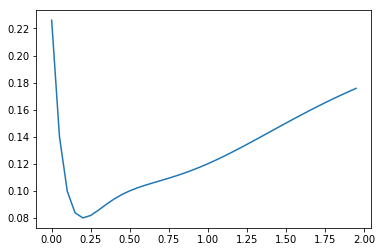

In [7]:
plot(t, term_struct)

In [8]:
term_struct = (np.dstack((np.exp(-alpha[0, 0] * t), np.exp(-alpha[0, 1] * t))).reshape((len(t), n_exp_size)) @ c 
               + xbar[0, 0])

ValueError: cannot reshape array of size 80 into shape (40,5)